O departamento de crédito da QuantumFinance solicitou a criação de um algoritmo para prever o preço de venda de suas casas com base em várias características. Eles coletaram dados de vendas recentes, incluindo informações como o tamanho da casa (em pés quadrados), o número de quartos, o número de banheiros, a idade da casa (em anos) e a proximidade com o centro da cidade (em quilômetros).

O objetivo é desenvolver um modelo de Regressão Linear Multivariada que preveja o preço de venda das casas com base nessas características. Para isso, você recebeu um conjunto de dados contendo informações de venda de várias casas, incluindo o preço de venda e as características mencionadas anteriormente.

**Seu trabalho é:**
- Explorar e analisar os dados para entender a distribuição das características e a relação com o preço de venda.
- Dividir o conjunto de dados em conjuntos de treinamento e teste.
- Desenvolver um modelo de Regressão Linear Multivariada utilizando as características como variáveis independentes e o preço de venda como variável dependente.
- Avaliar o desempenho do modelo usando métricas como o RMSE abaixo de 69000.
- Fazer previsões do preço de venda para novas casas com base nas características fornecidas.

**Entregáveis:**
- Jupyter Notebook: O notebook deverá estar bem organizado com seções claras e textos que facilitem a compreensão da análise e decisões tomadas e que permita a obtenção do resultado final a partir do dataset disponibilizado.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot  as plt
import datetime
from datetime import datetime
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score ,mean_squared_error


In [2]:
df = pd.read_csv('house_prices.csv')
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### **Explorar e analisar os dados para entender a distribuição das características e a relação com o preço de venda.**

In [3]:
df.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S') # Added 'T%H%M%S' to the format string to handle the 'T' and trailing zeros
df['Ano'] = df['date'].dt.year
df['Mes'] = df['date'].dt.month
df['age_built'] = datetime.now().year - df['yr_built']
df['Ano']


,Ano
0,2014
1,2014
2,2015
3,2014
4,2015
...,...
21608,2014
21609,2015
21610,2014
21611,2015


In [7]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [8]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Ano,Mes,age_built
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,52.994864
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,9.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,27.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,49.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,73.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,124.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,29.373411


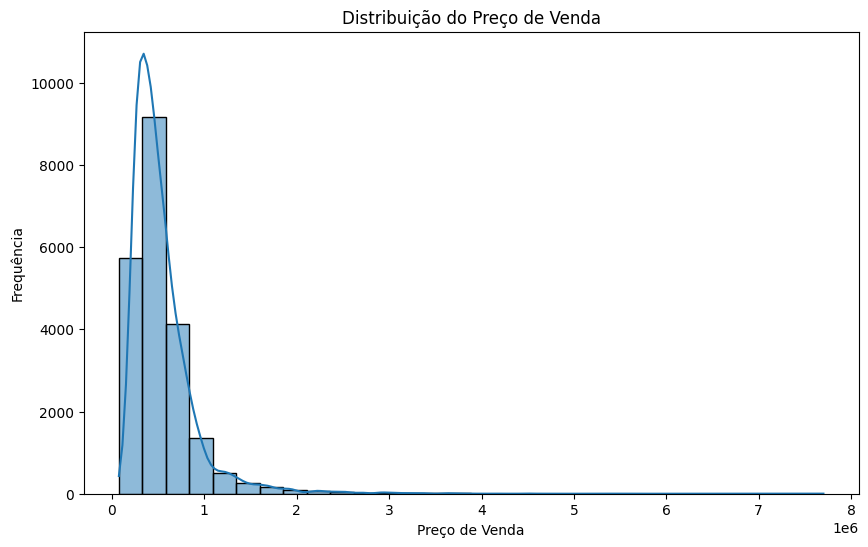

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribuição do Preço de Venda')
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência')
plt.show()

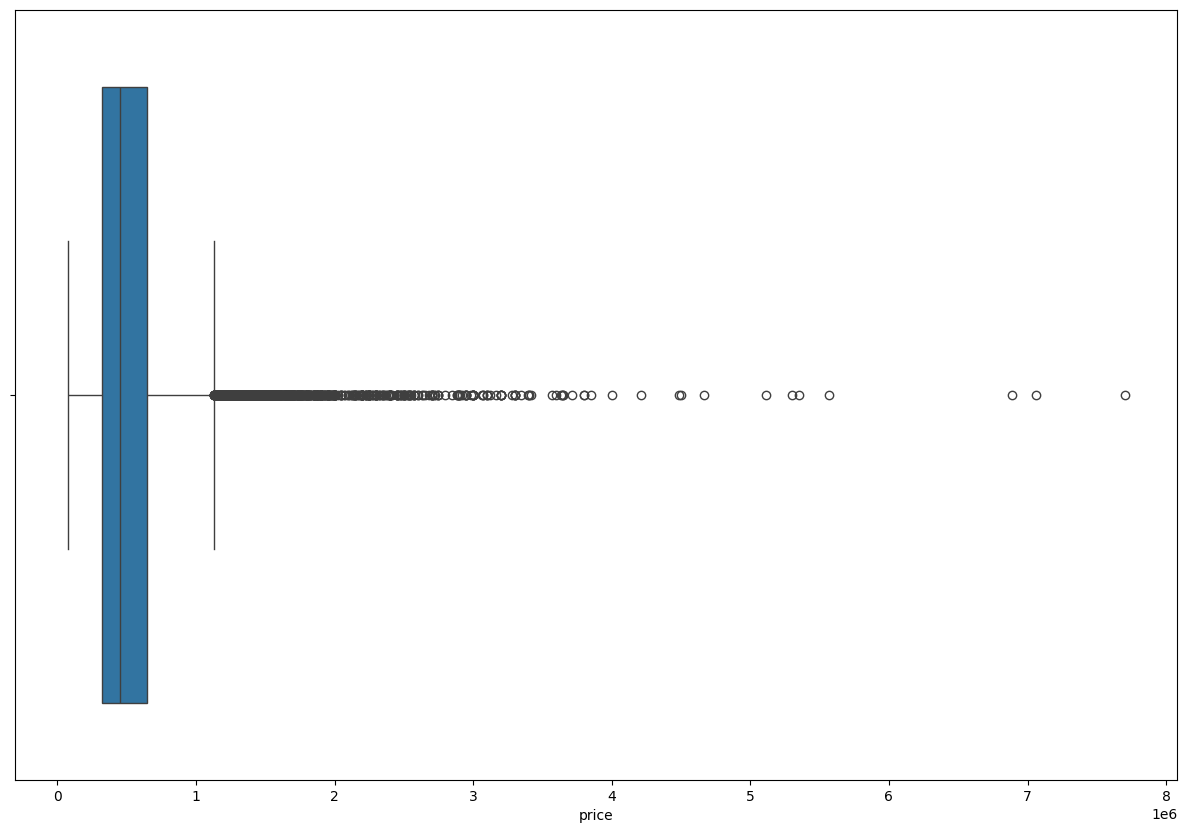

In [10]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=df['price'])
plt.show()

In [11]:
df['price'].describe()

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


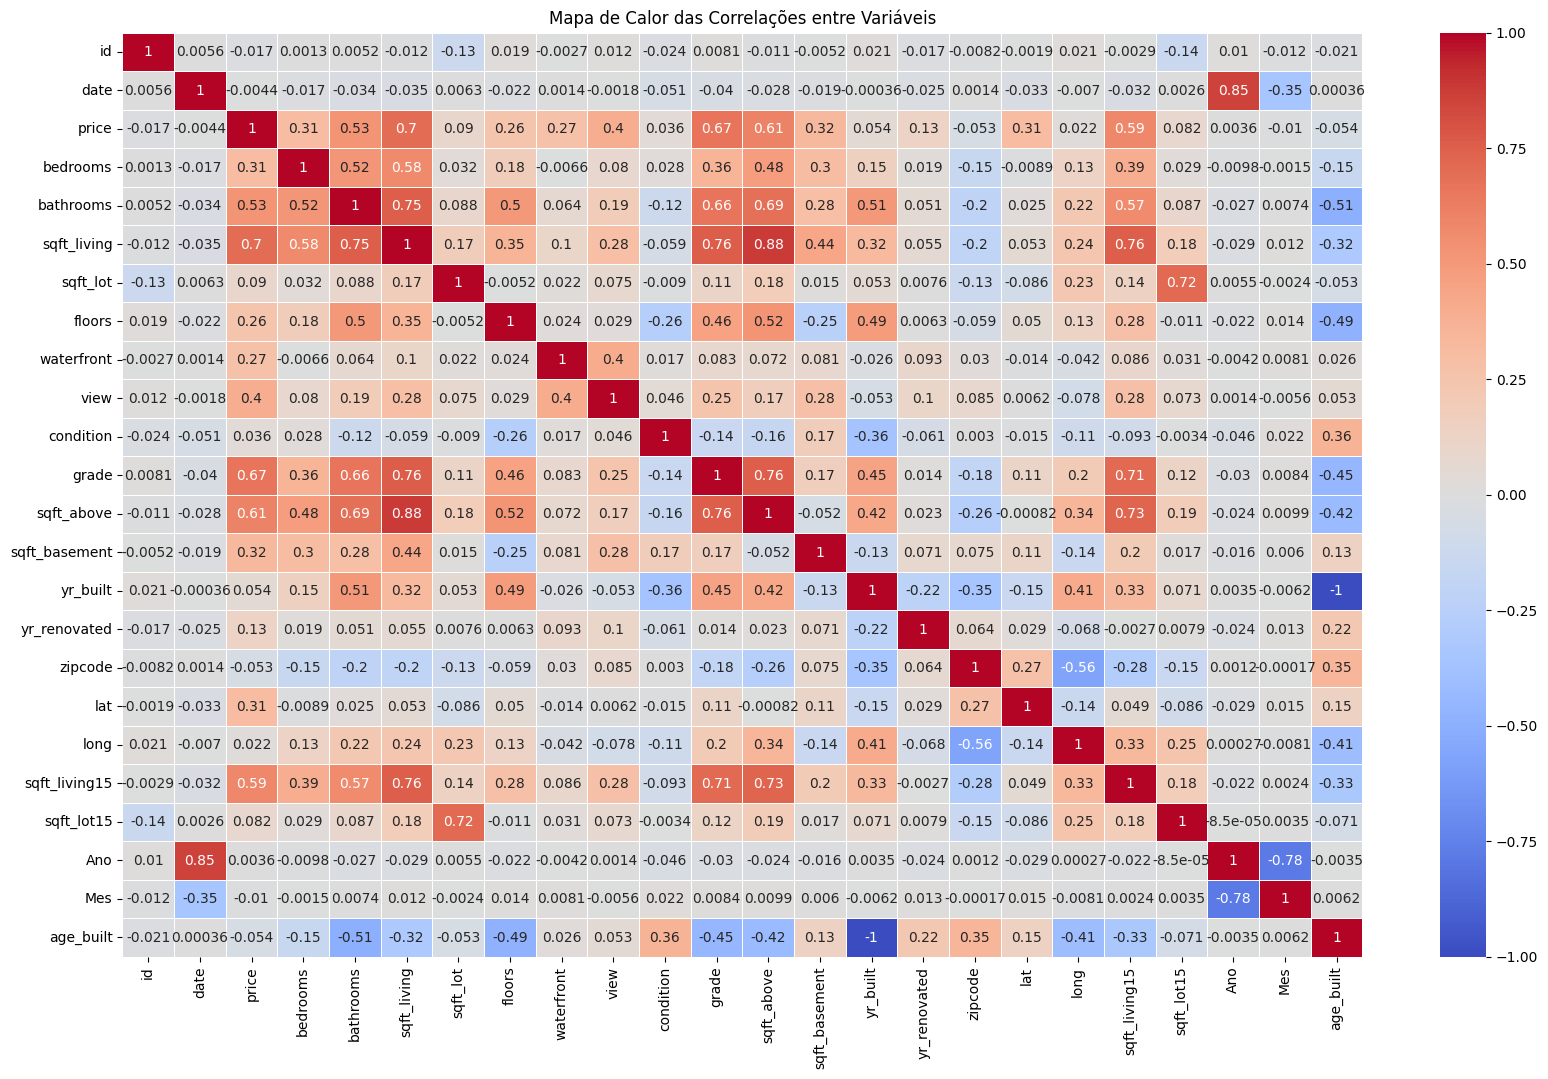

In [12]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor das Correlações entre Variáveis')
plt.show()

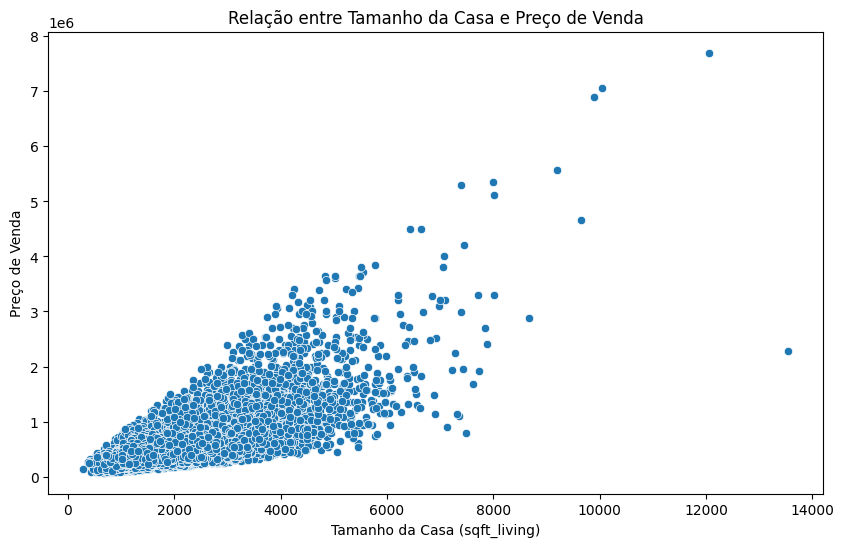

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Relação entre Tamanho da Casa e Preço de Venda')
plt.xlabel('Tamanho da Casa (sqft_living)')
plt.ylabel('Preço de Venda')
plt.show()

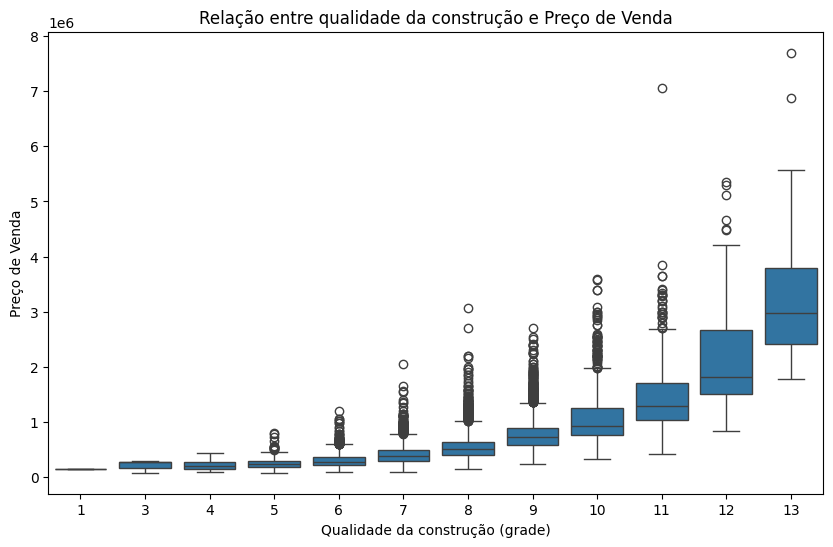

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='price', data=df)
plt.title('Relação entre qualidade da construção e Preço de Venda')
plt.xlabel('Qualidade da construção (grade)')
plt.ylabel('Preço de Venda')
plt.show()

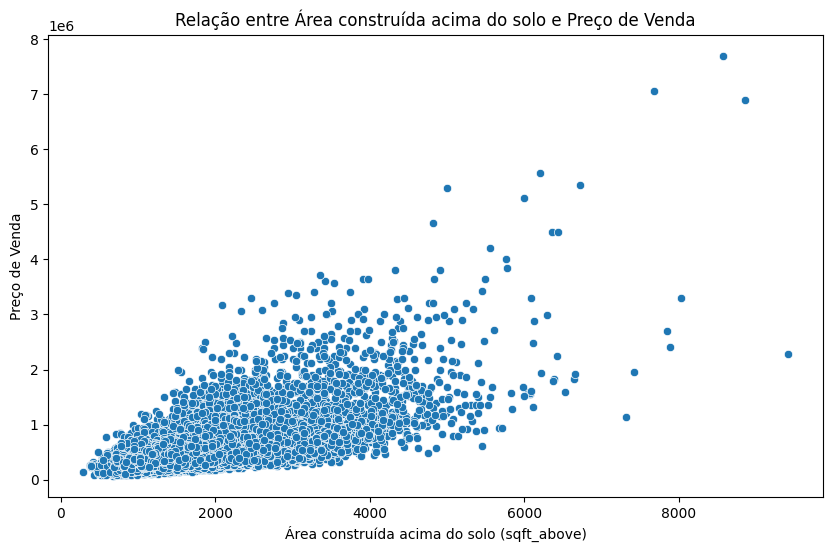

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_above', y='price', data=df)
plt.title('Relação entre Área construída acima do solo e Preço de Venda')
plt.xlabel('Área construída acima do solo (sqft_above)')
plt.ylabel('Preço de Venda')
plt.show()

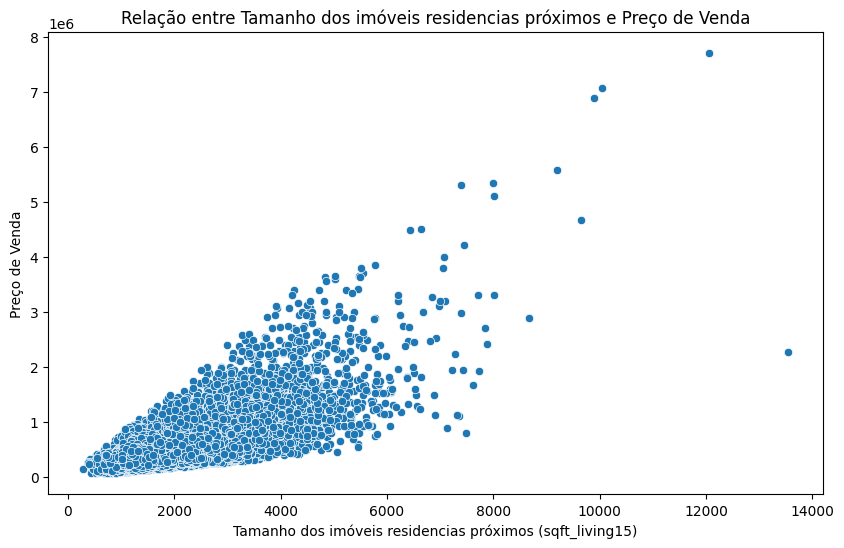

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Relação entre Tamanho dos imóveis residencias próximos e Preço de Venda')
plt.xlabel('Tamanho dos imóveis residencias próximos (sqft_living15)')
plt.ylabel('Preço de Venda')
plt.show()

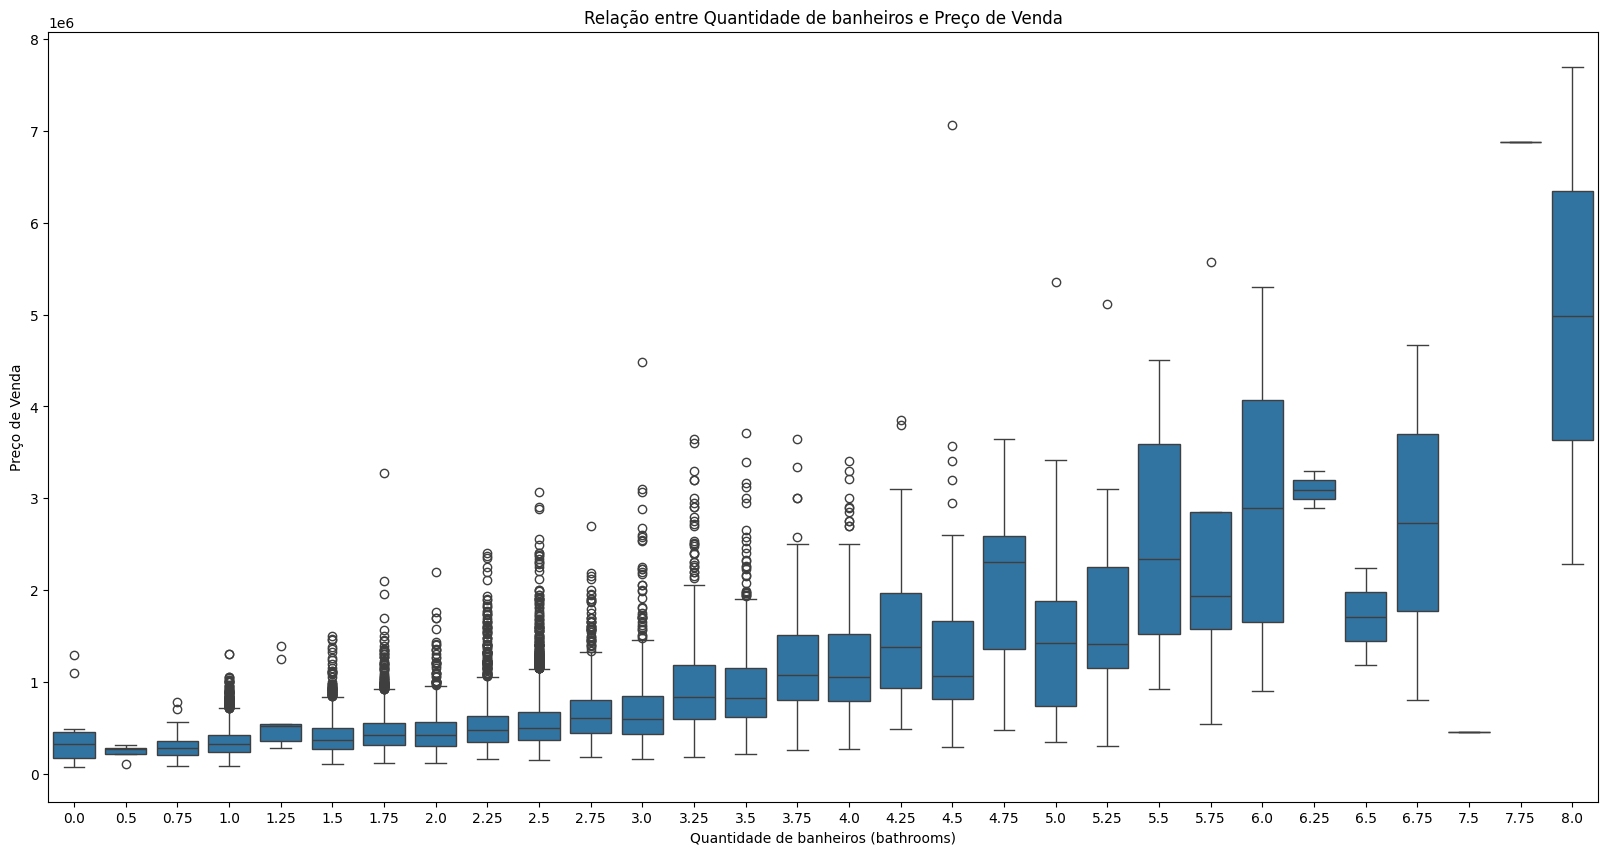

In [17]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Relação entre Quantidade de banheiros e Preço de Venda')
plt.xlabel('Quantidade de banheiros (bathrooms)')
plt.ylabel('Preço de Venda')
plt.show()

In [18]:
# Criaçao de colunas
import datetime

current_year = datetime.datetime.now().year

df['house_age'] = current_year - df['yr_built']
df['yr_renovated_adjusted'] = df.apply(lambda row: row['yr_renovated'] if row['yr_renovated'] > 0 else row['yr_built'], axis=1)

In [19]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,Ano,Mes,age_built,house_age,yr_renovated_adjusted
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,2014,10,69,69,1955
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,2014,12,73,73,1991
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,2015,2,91,91,1933
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,2014,12,59,59,1965
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,2015,2,37,37,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,98103,47.6993,-122.346,1530,1509,2014,5,15,15,2009
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,98146,47.5107,-122.362,1830,7200,2015,2,10,10,2014
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,98144,47.5944,-122.299,1020,2007,2014,6,15,15,2009
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,98027,47.5345,-122.069,1410,1287,2015,1,20,20,2004


In [20]:
# Seleção de Variáveis para o modelo.
features = ['zipcode','bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
            'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long',
            'sqft_living15', 'sqft_lot15','Ano', 'Mes', 'house_age', 'yr_renovated_adjusted']

X = df[features]
y = df['price']

<Axes: >

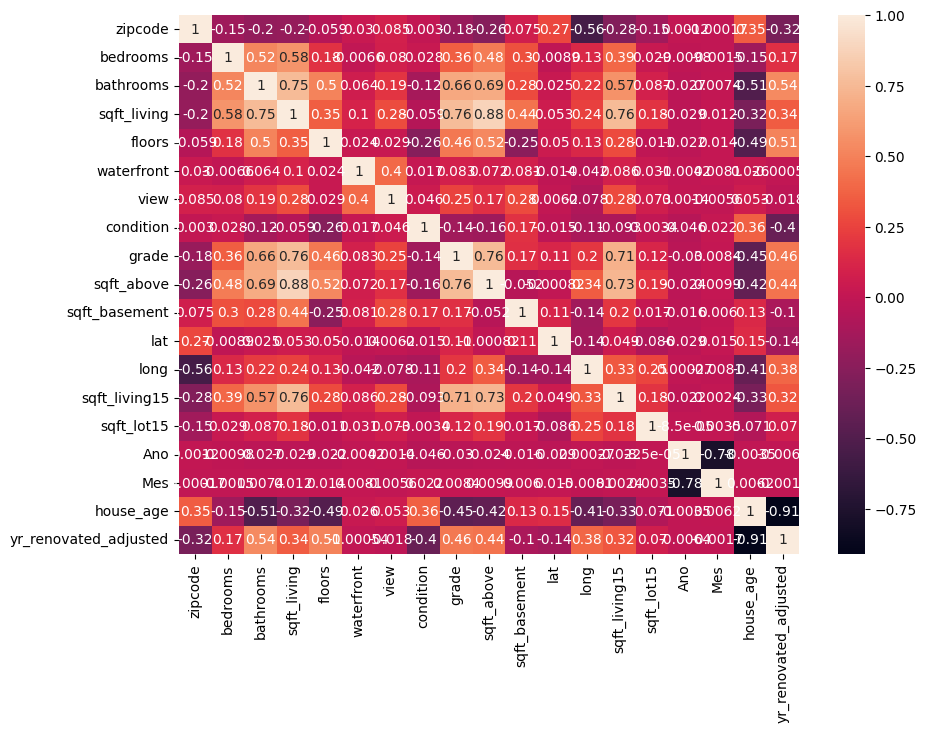

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(df[features].corr(), annot=True)

In [22]:
def limites(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return lim_inf, lim_sup

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas

def diagrama_caixa(coluna, nome_coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    plt.suptitle(f"Diagrama de Caixa para {nome_coluna}")
    plt.show()

def histograma(coluna, nome_coluna):
    plt.figure(figsize=(10, 4))
    sns.histplot(coluna, kde=True)
    plt.title(f"Histograma para {nome_coluna}")
    plt.show()

def grafico_barra(coluna, nome_coluna):
    plt.figure(figsize=(12, 4))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    plt.title(f"Gráfico de Barras para {nome_coluna}")
    plt.show()

# Função principal para aplicar todas as análises às colunas fornecidas
def analisar_features(df, features):
    total_outliers_removidos = 0
    for feature in features:
        print(f"Analisando a feature: {feature}")

        df, removidos = excluir_outliers(df, feature)
        total_outliers_removidos += removidos
        print(f"Outliers removidos de {feature}: {removidos}")

        print(f"Gerando diagramas e histogramas para {feature}")
        diagrama_caixa(df[feature], feature)
        histograma(df[feature], feature)

        if df[feature].dtype == 'object' or len(df[feature].unique()) < 15:
            grafico_barra(df[feature], feature)

    print(f"Total de outliers removidos: {total_outliers_removidos}")
    return df


Estatísticas descritivas
Analisando a feature: zipcode
Outliers removidos de zipcode: 0
Gerando diagramas e histogramas para zipcode


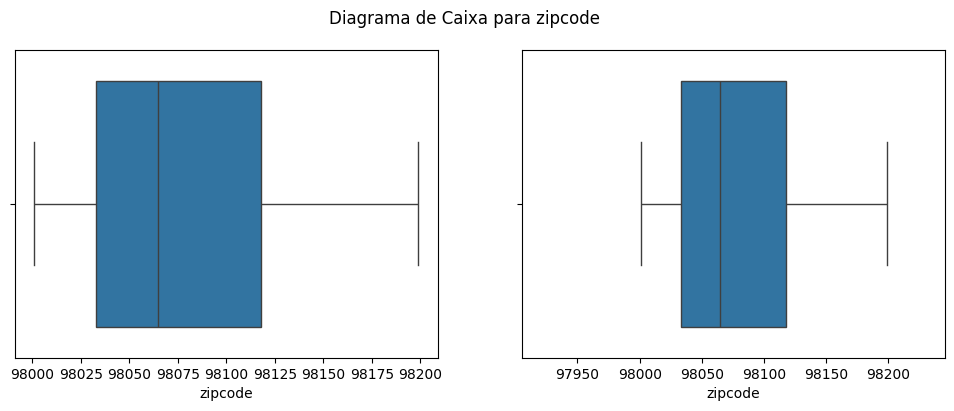

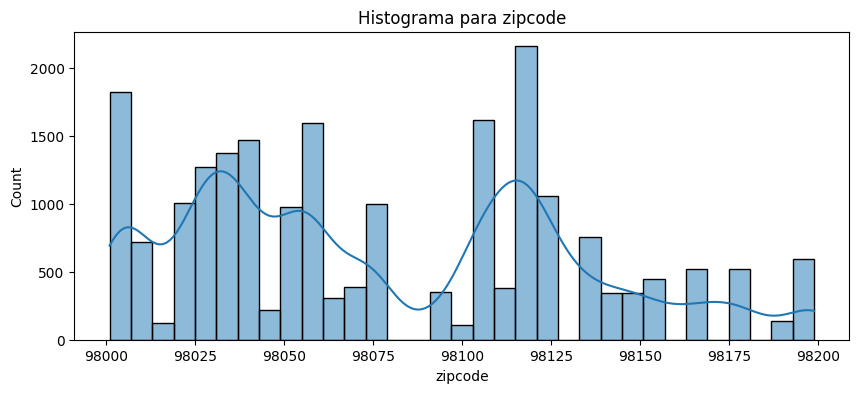

Analisando a feature: bedrooms
Outliers removidos de bedrooms: 546
Gerando diagramas e histogramas para bedrooms


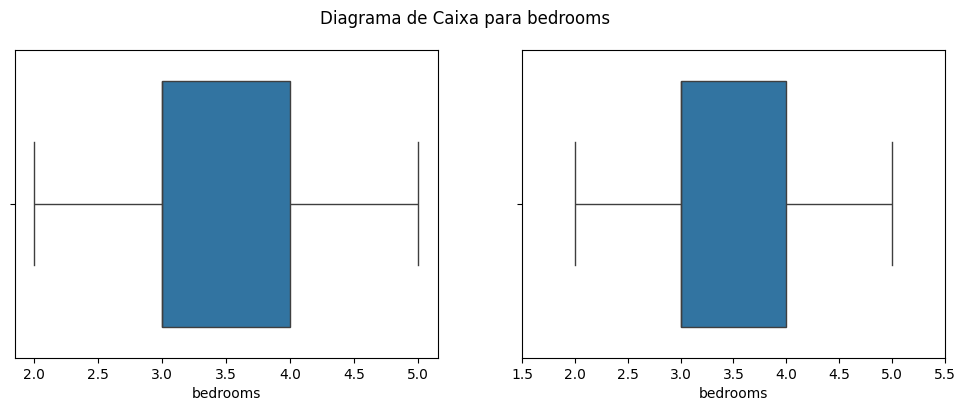

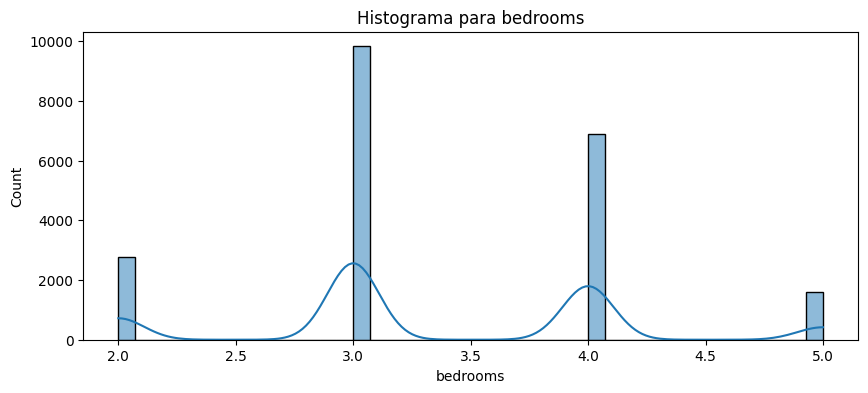

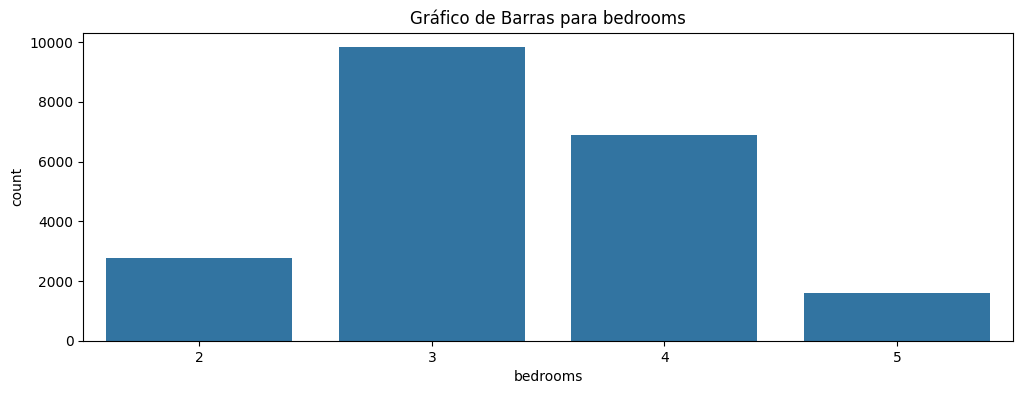

Analisando a feature: bathrooms
Outliers removidos de bathrooms: 461
Gerando diagramas e histogramas para bathrooms


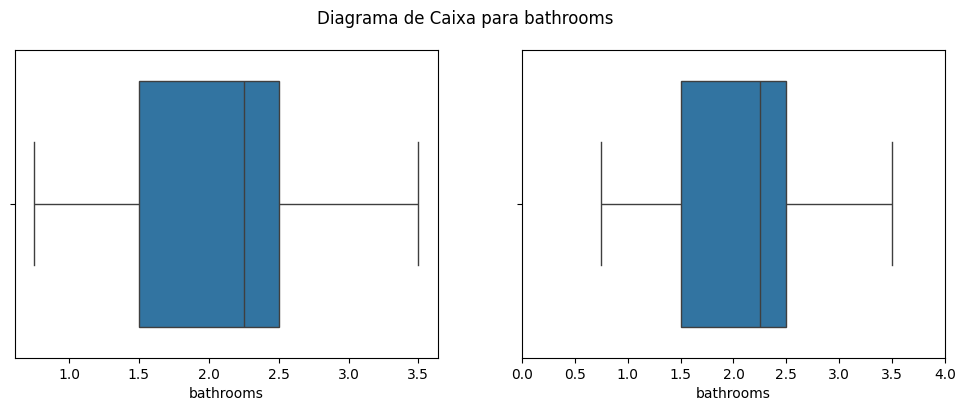

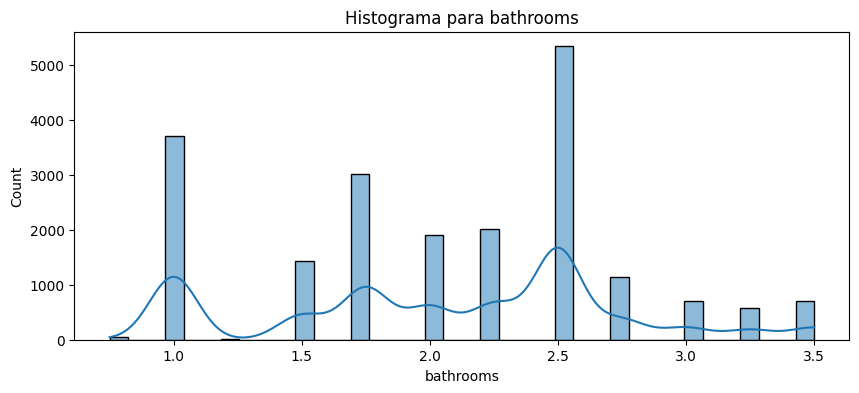

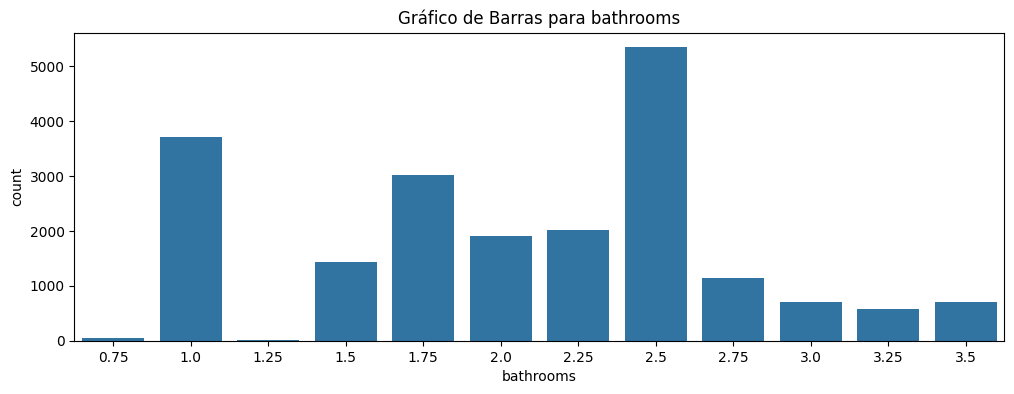

Analisando a feature: sqft_living
Outliers removidos de sqft_living: 377
Gerando diagramas e histogramas para sqft_living


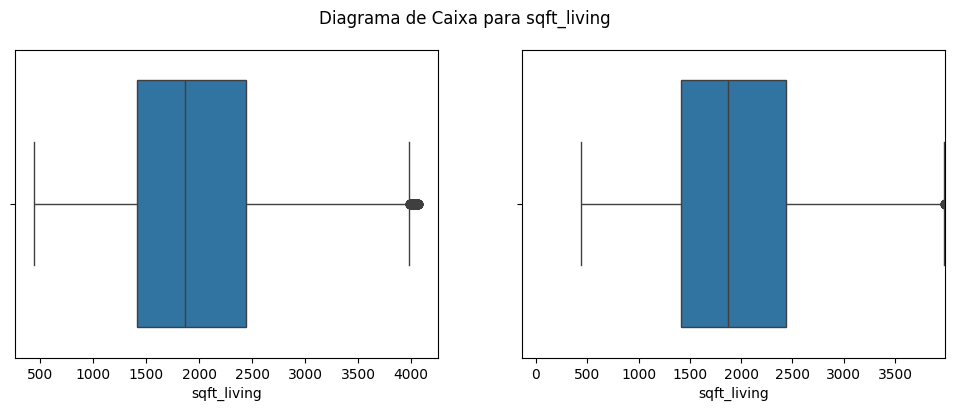

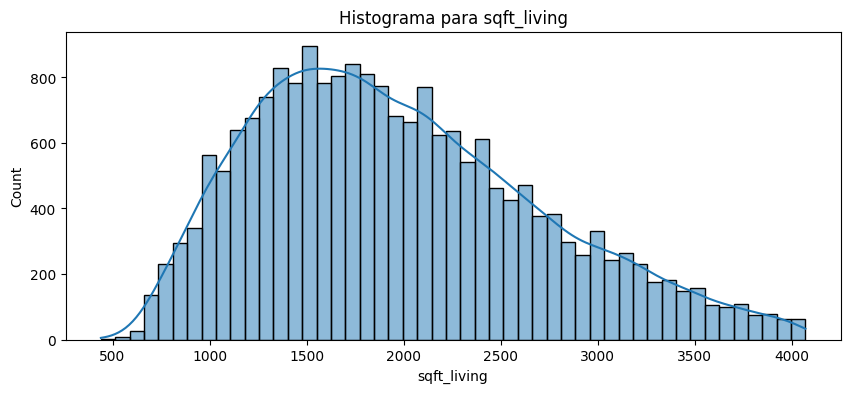

Analisando a feature: floors
Outliers removidos de floors: 0
Gerando diagramas e histogramas para floors


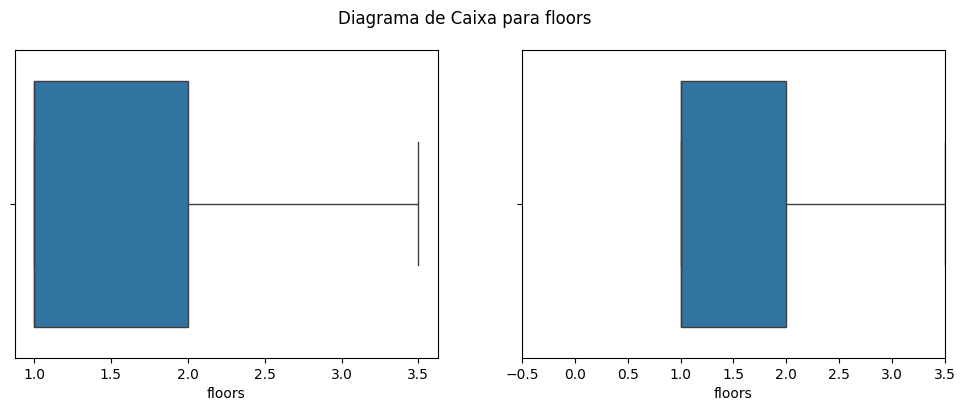

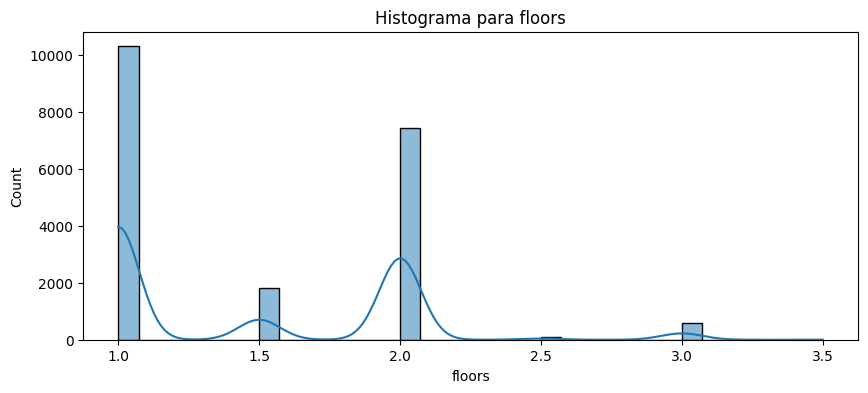

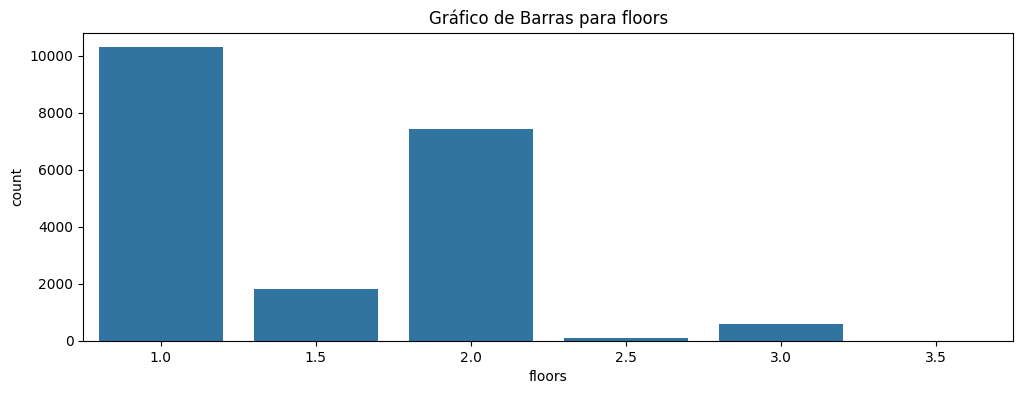

Analisando a feature: waterfront
Outliers removidos de waterfront: 114
Gerando diagramas e histogramas para waterfront


<ipython-input-22-0d4bad0c2bfb>:20: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax2.set_xlim(limites(coluna))


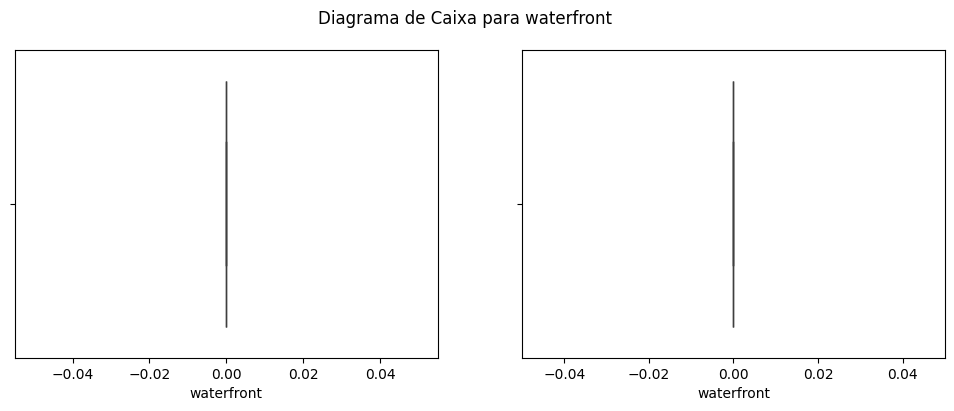

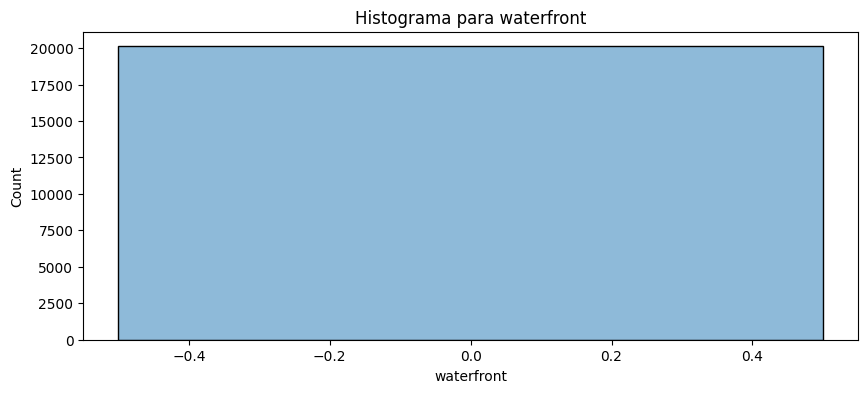

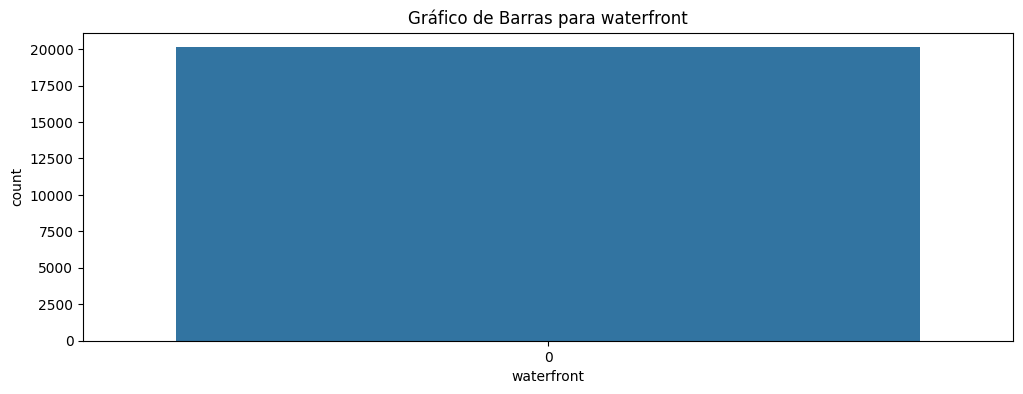

Analisando a feature: view
Outliers removidos de view: 1622
Gerando diagramas e histogramas para view


<ipython-input-22-0d4bad0c2bfb>:20: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax2.set_xlim(limites(coluna))


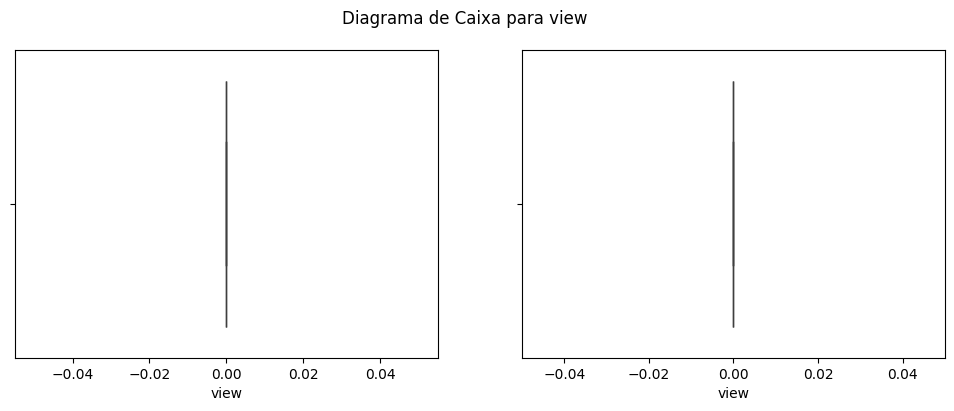

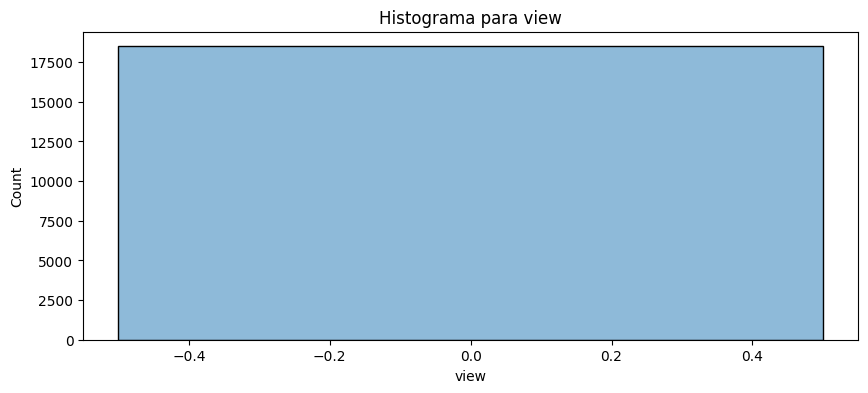

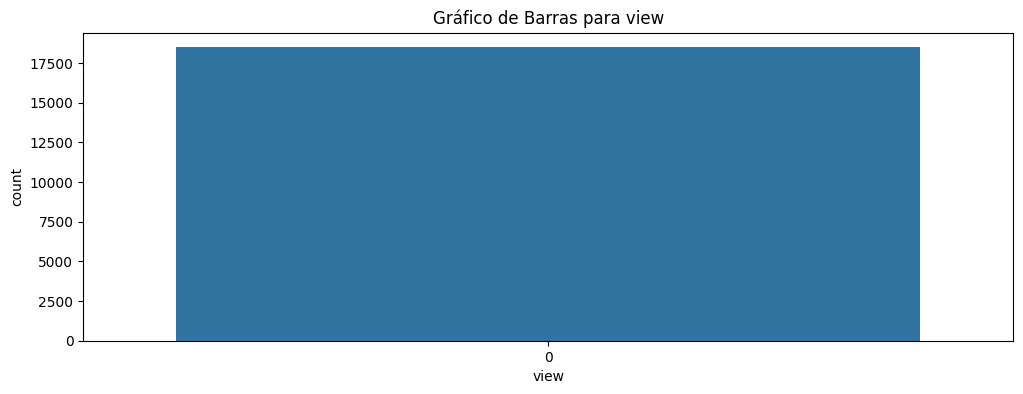

Analisando a feature: condition
Outliers removidos de condition: 22
Gerando diagramas e histogramas para condition


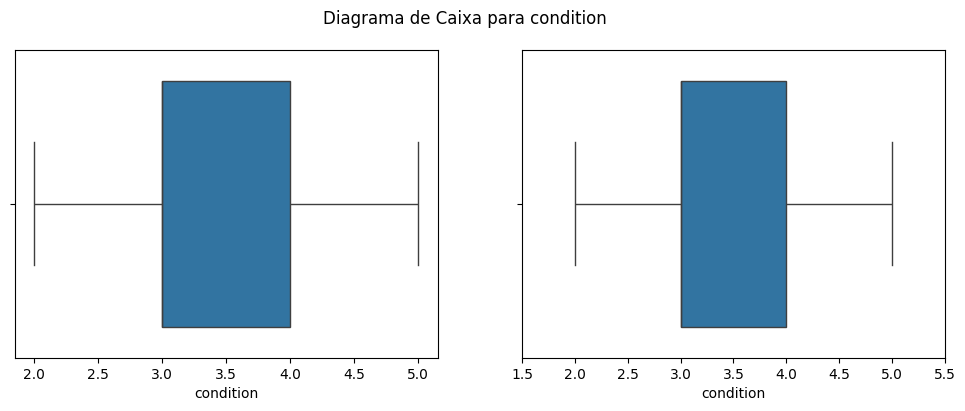

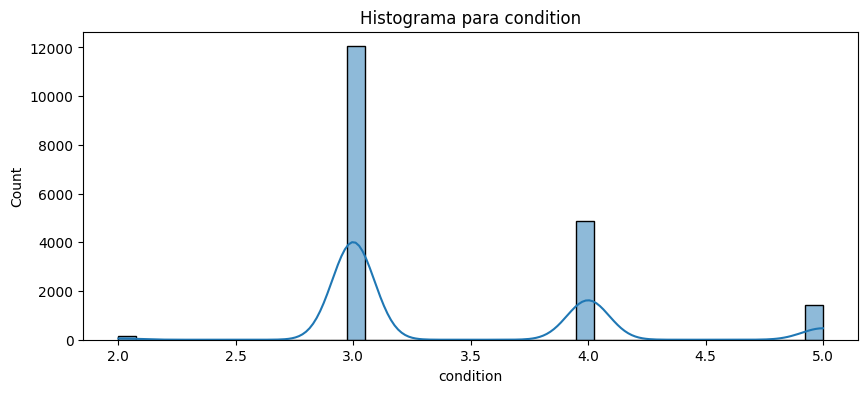

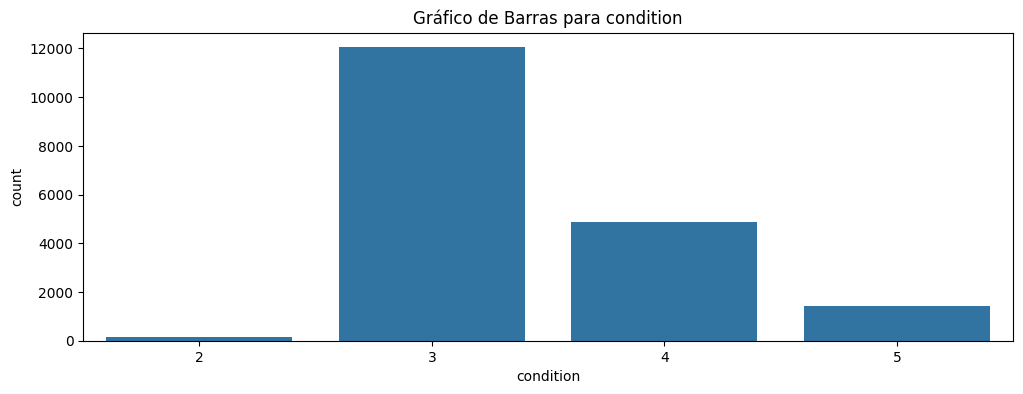

Analisando a feature: grade
Outliers removidos de grade: 945
Gerando diagramas e histogramas para grade


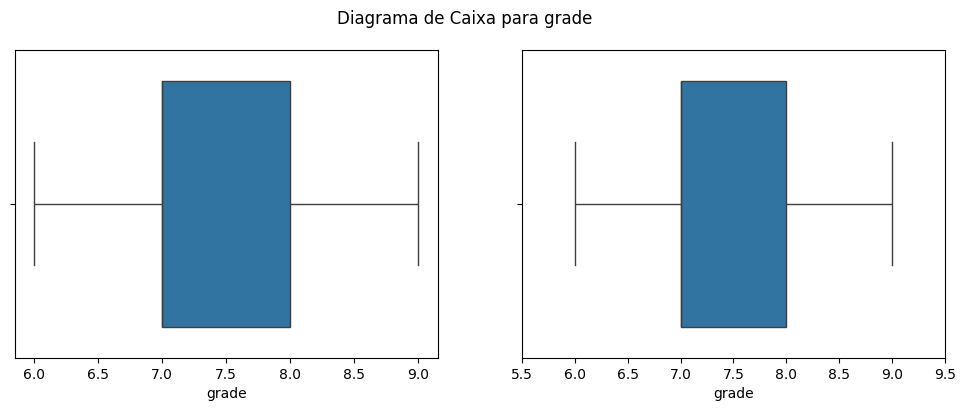

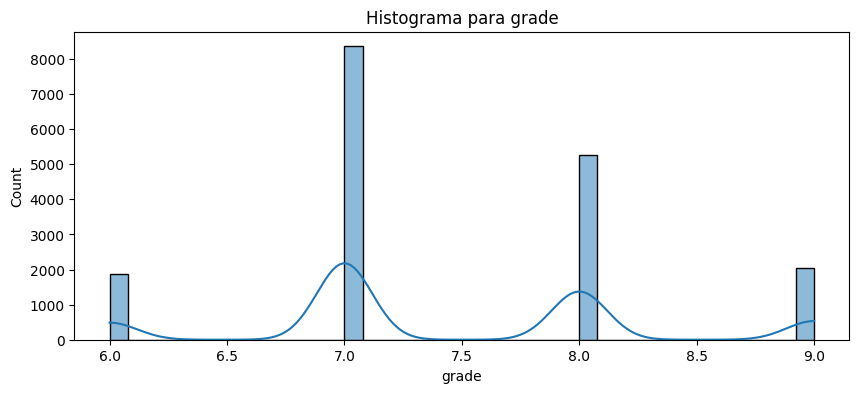

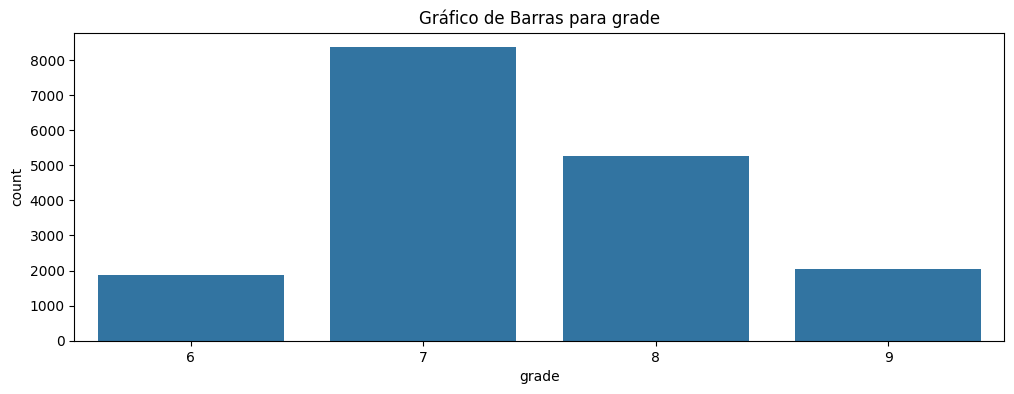

Analisando a feature: sqft_above
Outliers removidos de sqft_above: 302
Gerando diagramas e histogramas para sqft_above


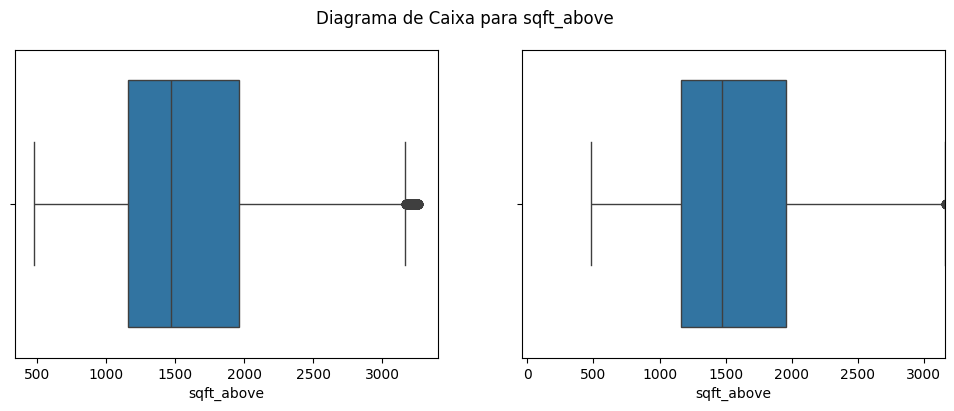

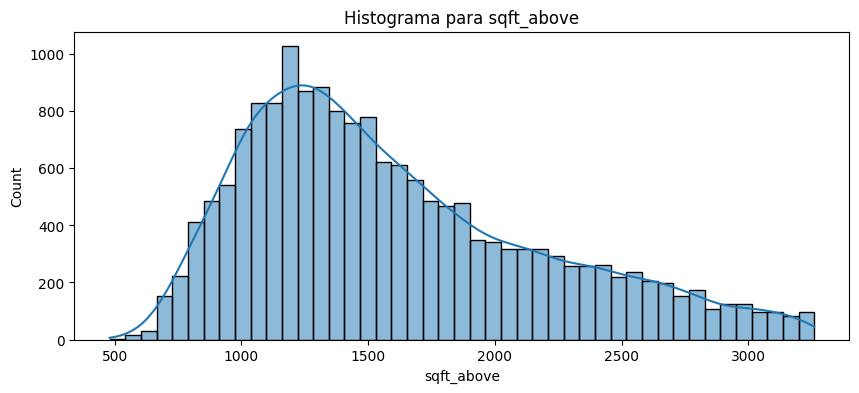

Analisando a feature: sqft_basement
Outliers removidos de sqft_basement: 413
Gerando diagramas e histogramas para sqft_basement


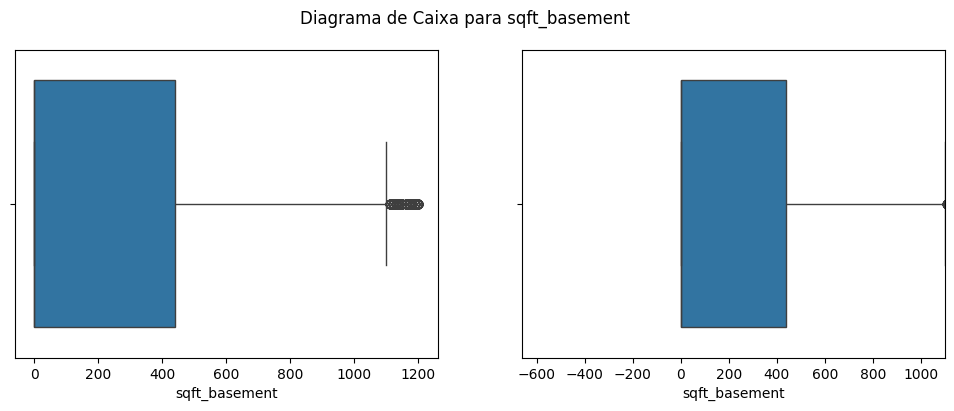

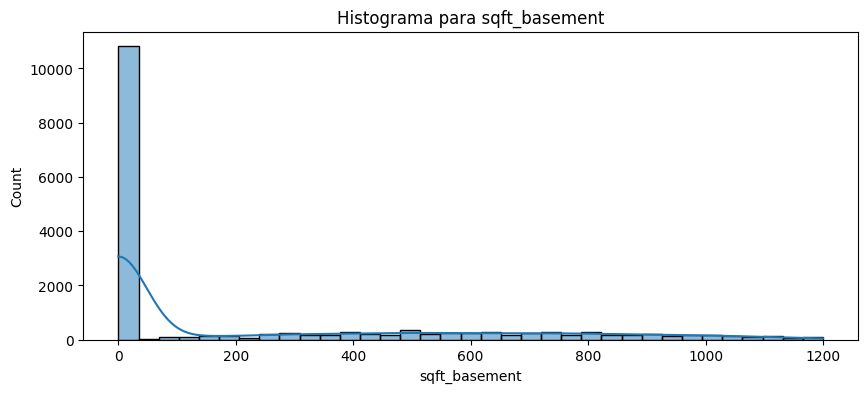

Analisando a feature: lat
Outliers removidos de lat: 0
Gerando diagramas e histogramas para lat


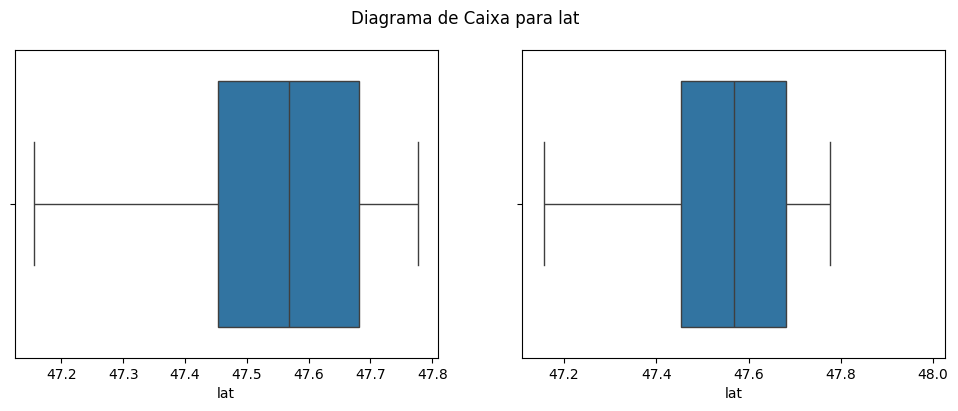

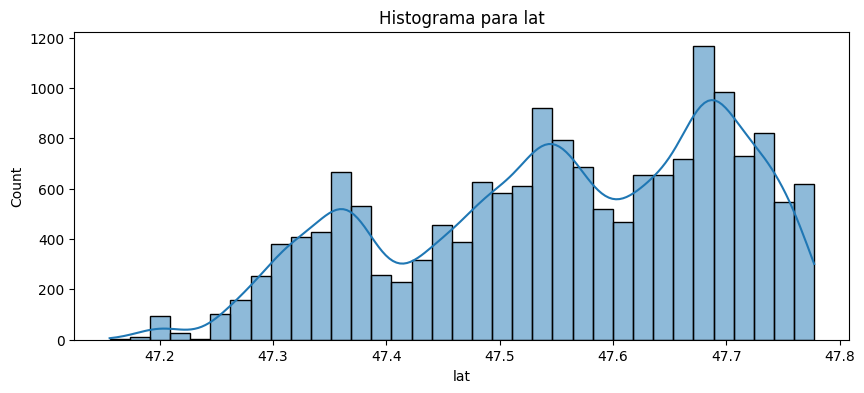

Analisando a feature: long
Outliers removidos de long: 216
Gerando diagramas e histogramas para long


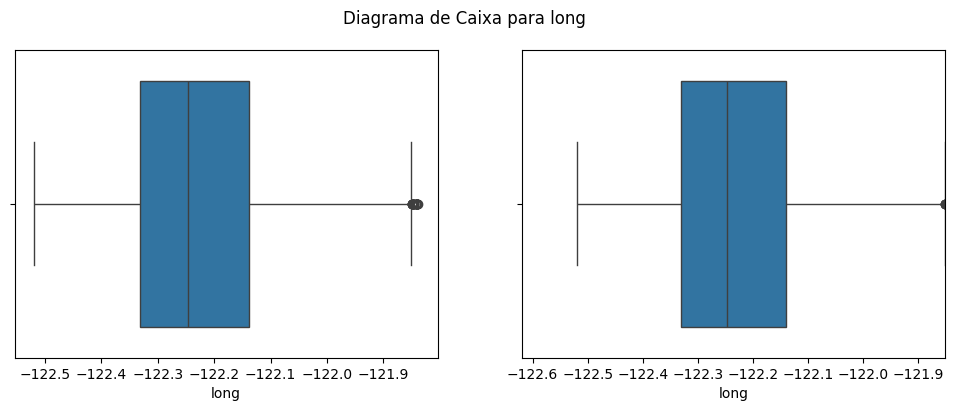

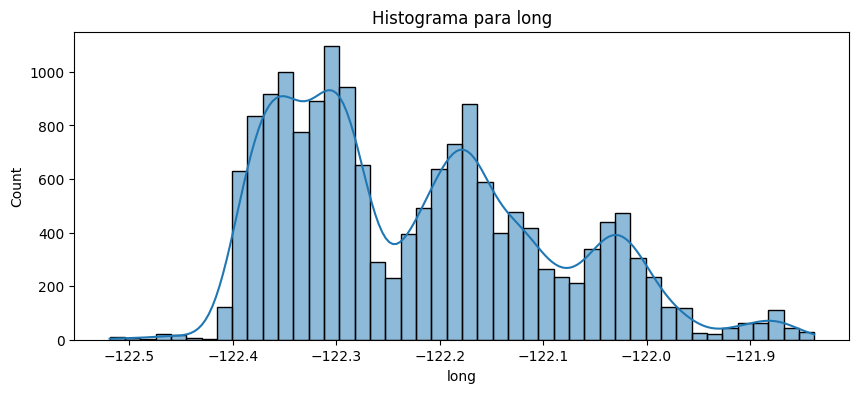

Analisando a feature: sqft_living15
Outliers removidos de sqft_living15: 171
Gerando diagramas e histogramas para sqft_living15


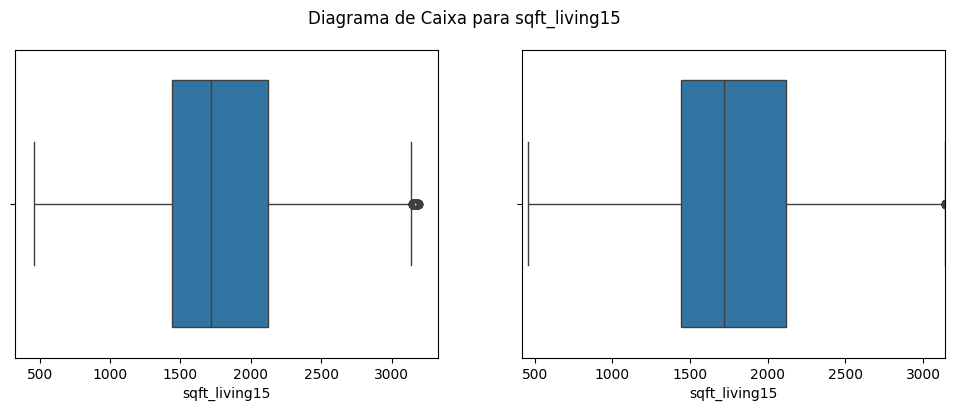

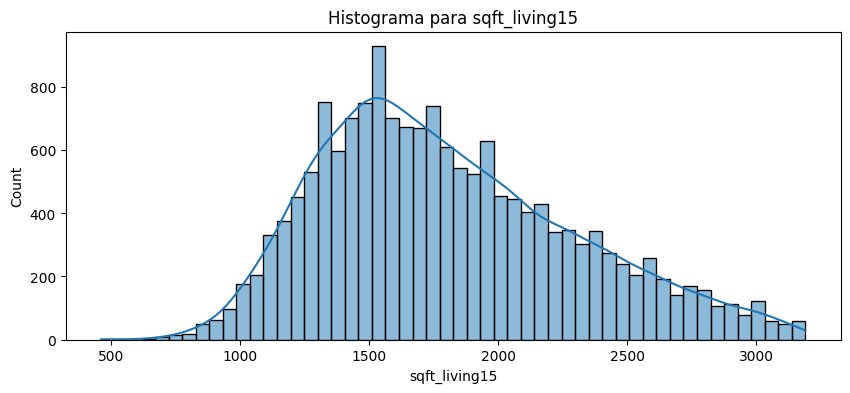

Analisando a feature: sqft_lot15
Outliers removidos de sqft_lot15: 1198
Gerando diagramas e histogramas para sqft_lot15


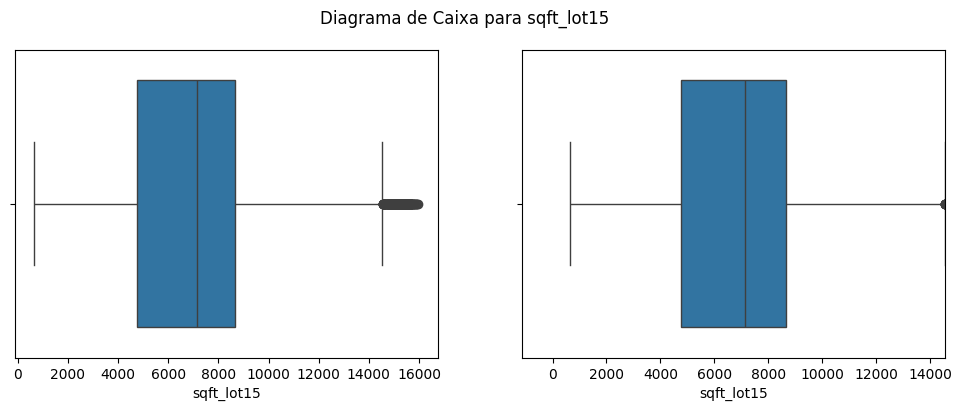

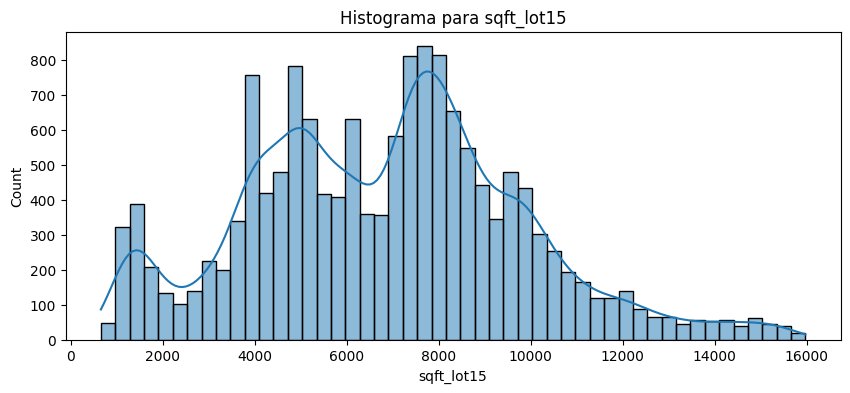

Analisando a feature: Ano
Outliers removidos de Ano: 0
Gerando diagramas e histogramas para Ano


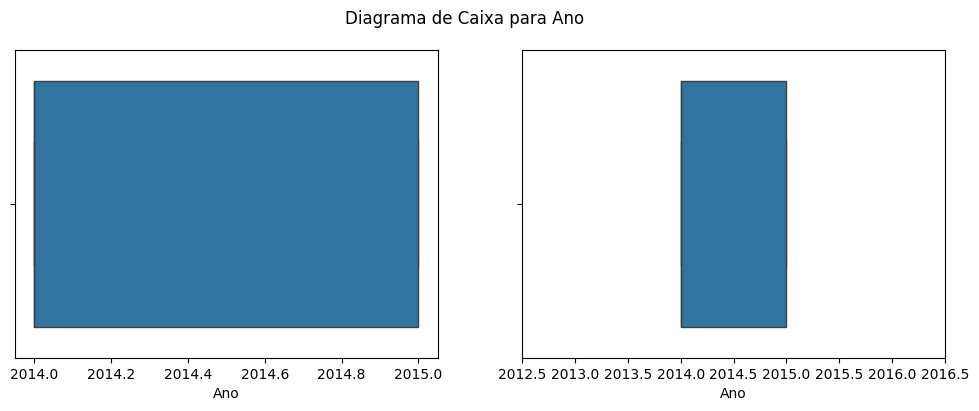

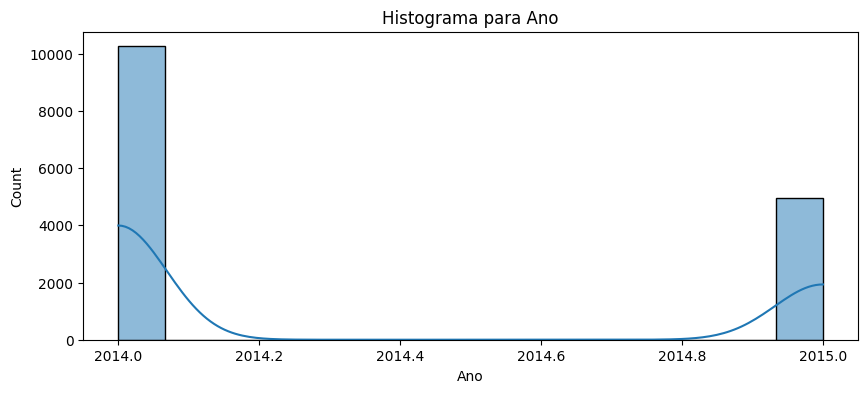

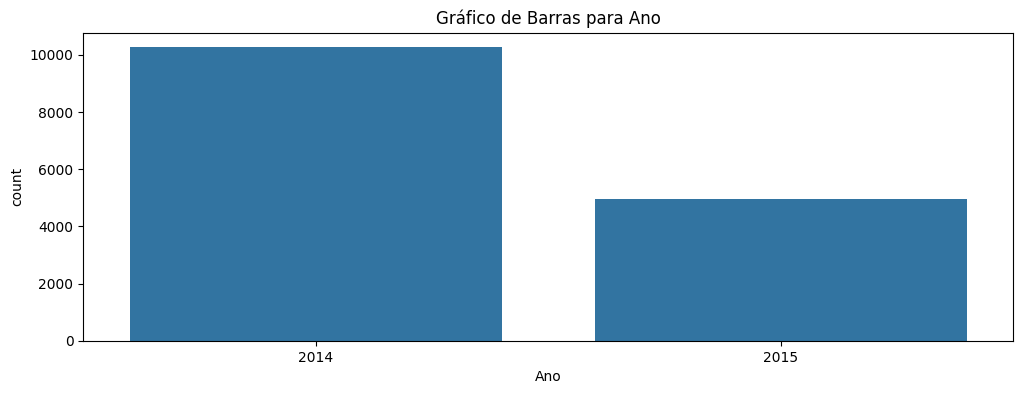

Analisando a feature: Mes
Outliers removidos de Mes: 0
Gerando diagramas e histogramas para Mes


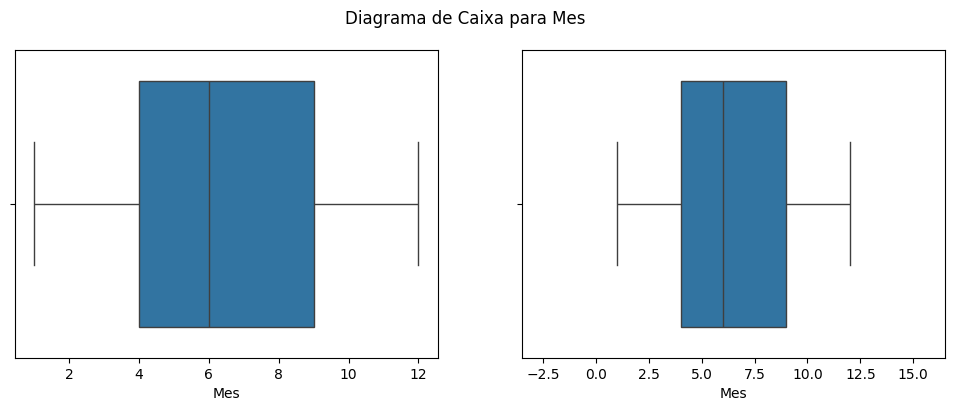

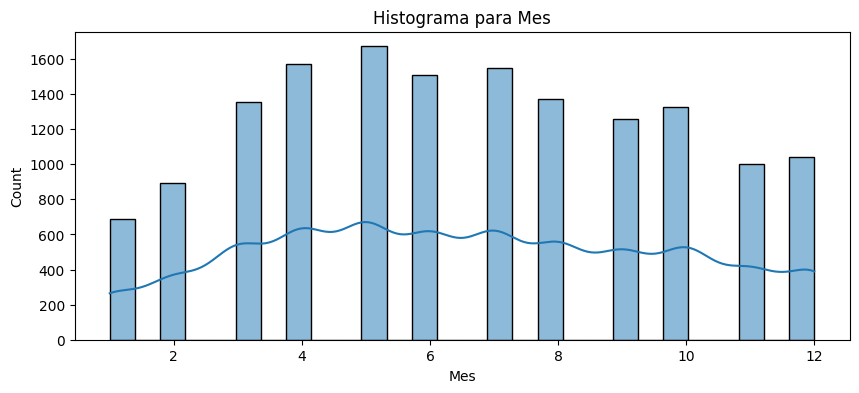

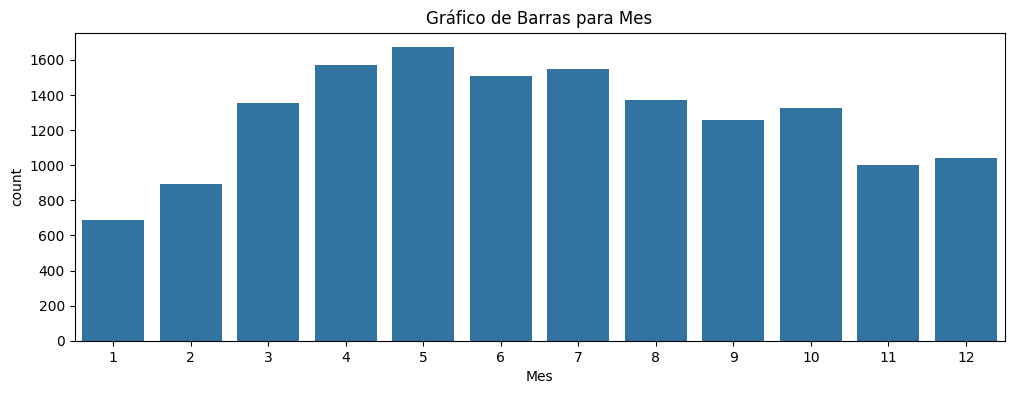

Analisando a feature: house_age
Outliers removidos de house_age: 0
Gerando diagramas e histogramas para house_age


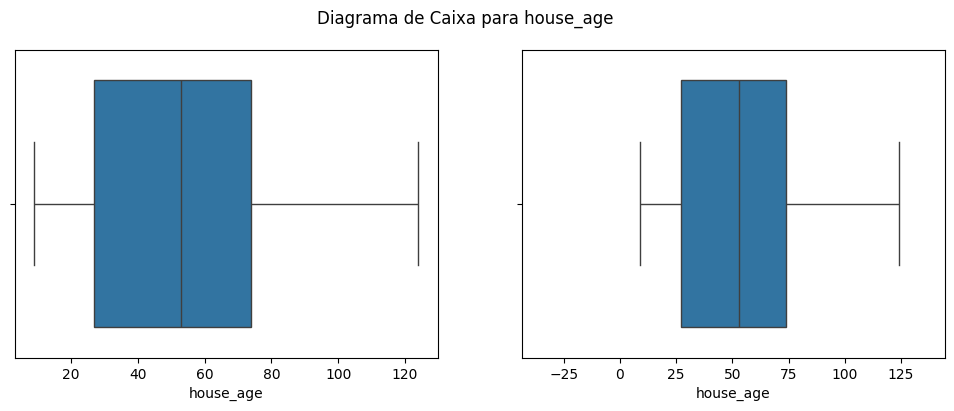

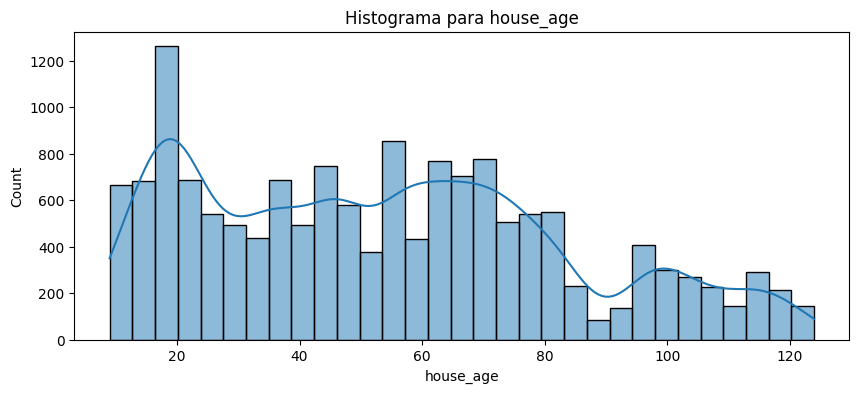

Analisando a feature: yr_renovated_adjusted
Outliers removidos de yr_renovated_adjusted: 0
Gerando diagramas e histogramas para yr_renovated_adjusted


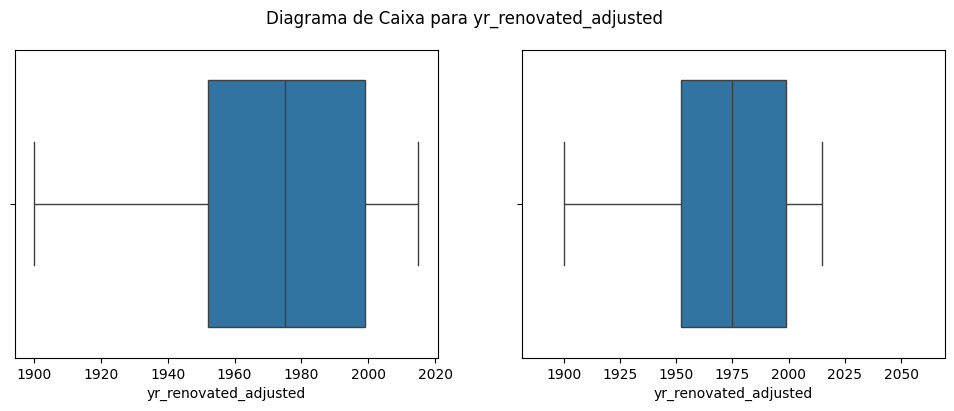

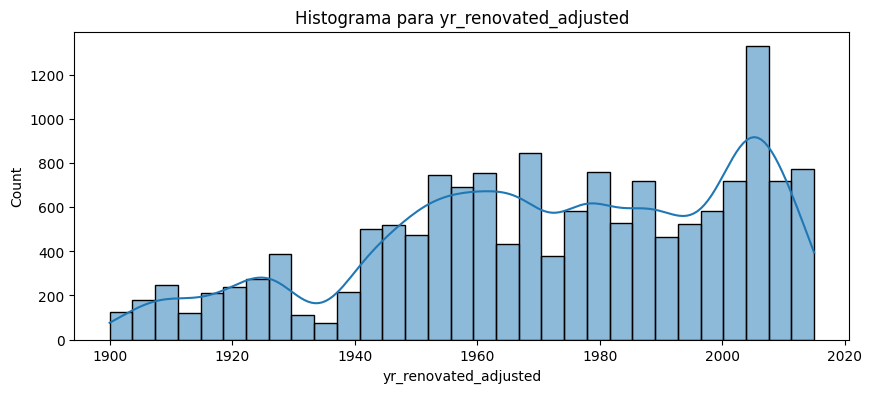

Total de outliers removidos: 6387
                 id                           date         price  \
count  1.522600e+04                          15226  1.522600e+04   
mean   4.692534e+09  2014-10-30 07:37:44.600026368  4.420963e+05   
min    2.800031e+06            2014-05-02 00:00:00  8.200000e+04   
25%    2.267001e+09            2014-07-23 00:00:00  3.000000e+05   
50%    4.025300e+09            2014-10-17 00:00:00  4.050000e+05   
75%    7.417701e+09            2015-02-18 00:00:00  5.450000e+05   
max    9.900000e+09            2015-05-24 00:00:00  1.850000e+06   
std    2.855935e+09                            NaN  1.954421e+05   

           bedrooms     bathrooms   sqft_living       sqft_lot        floors  \
count  15226.000000  15226.000000  15226.000000   15226.000000  15226.000000   
mean       3.243925      1.959707   1787.315907    7401.353474      1.468344   
min        2.000000      0.750000    560.000000     520.000000      1.000000   
25%        3.000000      1.500000

In [23]:
# View descriptive statistics
print("\nEstatísticas descritivas")
df_atualizado = analisar_features(df, features)
print(df_atualizado.describe())

In [24]:
df_atualizado
features_para_analisar = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','view','grade','yr_built','yr_renovated','lat','long']
df = df_atualizado.loc[:,features_para_analisar]
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,yr_built,yr_renovated,lat,long
0,221900.0,3,1.00,1180,5650,0,7,1955,0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,0,7,1951,1991,47.7210,-122.319
2,180000.0,2,1.00,770,10000,0,6,1933,0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,0,7,1965,0,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,0,8,1987,0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,0,8,2009,0,47.6993,-122.346
21609,400000.0,4,2.50,2310,5813,0,8,2014,0,47.5107,-122.362
21610,402101.0,2,0.75,1020,1350,0,7,2009,0,47.5944,-122.299
21611,400000.0,3,2.50,1600,2388,0,8,2004,0,47.5345,-122.069


In [34]:

def modelo_avaliativo(nome_modelo, y_test, previsao):
    r2 = r2_score(y_test, previsao)
    RMSE = np.sqrt(mean_squared_error(y_test, previsao))
    return f'Modelo {nome_modelo}:\nR²: {r2}\nRMSE: {RMSE}'

In [35]:
modelos_avaliativos={

             'Linear Regression':LinearRegression(),
             'Random Forest':RandomForestRegressor(),
             'Decision Tree':DecisionTreeRegressor()}

x=df.drop(['price'],axis=1)
y=df['price']

In [36]:
# Dividir para treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.1, random_state=10)

In [37]:
for nome_modelo, modelo in modelos_avaliativos.items():
    #treinar
    modelo.fit(xtrain, ytrain)
    #testar
    previsao = modelo.predict(xtest)
    print(avaliar_modelo(nome_modelo,ytest,previsao))

Modelo Linear Regression:
R²:0.5846801220781843
RSME:124934.63828065716
Modelo Random Forest:
R²:0.8632231183612289
RSME:71696.48326978929
Modelo Decision Tree:
R²:0.7410655724114248
RSME:98647.57271990972


### **Fazer previsões do preço de venda para novas casas com base nas características fornecidas.**

In [50]:
novas_casas = pd.DataFrame({
    'bedrooms': [3, 4],
    'bathrooms': [2, 3],
    'sqft_living': [1780, 2500],
    'sqft_lot': [7470, 7000],
    'view': [0, 1],
    'grade': [7, 8],
    'yr_built': [1960, 2005],
    'yr_renovated': [0, 0],
    'zipcode': [98146, 98052],
    'lat': [47.5123, 47.69],
    'long': [-122.337, -122.12],
    'sqft_living15': [1780, 2700],
    'sqft_lot15': [8113, 8000]
})


current_year = 2024
novas_casas['house_age'] = current_year - novas_casas['yr_built']
novas_casas['Ano'] = current_year
novas_casas['yr_renovated_adjusted'] = novas_casas['yr_renovated']

column_order = xtrain.columns

novas_casas = novas_casas[column_order]

model = modelos_avaliativos['Decision Tree']

previsoes = model.predict(novas_casas)
previsoes_originais = np.exp(previsoes)

<ipython-input-50-97770de6f065>:30: RuntimeWarning: overflow encountered in exp
  previsoes_originais = np.exp(previsoes)


In [47]:
for i, pred in enumerate(previsoes_originais):
    print(f"Casa {i+1}: Preço previsto = ${pred:.2f}")

Casa 1: Preço previsto = $inf
Casa 2: Preço previsto = $inf
